In [1]:
import snowflake.connector

# Set up connection parameters
ACCOUNT = 'yw24586.uk-south.azure'
USER = 'TOMMYMCD22'
PASSWORD = 'Snowflake1!'
WAREHOUSE = 'COMPUTE_WH'
DATABASE = 'EXAM'
SCHEMA = 'DBT_TMCDONAGH'

# Create a Snowflake connection object
conn = snowflake.connector.connect(
    account=ACCOUNT,
    user=USER,
    password=PASSWORD,
    warehouse=WAREHOUSE,
    database=DATABASE,
    schema=SCHEMA
)


In [2]:
# Create a cursor object
cursor_1 = conn.cursor()
cursor_2 = conn.cursor()

# Execute a SELECT statement to extract data from a Snowflake table
encoded = cursor_1.execute('SELECT * FROM EXAM_ENCODED')
plain = cursor_2.execute('SELECT * FROM EXAM_PLAIN')

# Fetch the results into a pandas DataFrame
import pandas as pd
encoded_results = encoded.fetchall()
encoded_df = pd.DataFrame(encoded_results, columns=[desc[0] for desc in cursor_1.description])

plain_results = plain.fetchall()
plain_df = pd.DataFrame(plain_results, columns=[desc[0] for desc in cursor_2.description])


In [3]:
plain_df

,GENDER,RACE,PARENT_EDUCATION,LUNCH,TEST_PREP,MATH_SCORE,READING_SCORE,WRITING_SCORE
0,female,group_B,bachelors_degree,standard,none,72,72,74
1,female,group_C,some_college,standard,completed,69,90,88
2,female,group_B,masters_degree,standard,none,90,95,93
3,male,group_A,associates_degree,free_reduced,none,47,57,44
4,male,group_C,some_college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group_E,masters_degree,standard,completed,88,99,95
996,male,group_C,high_school,free_reduced,none,62,55,55
997,female,group_C,high_school,free_reduced,completed,59,71,65
998,female,group_D,some_college,standard,completed,68,78,77


In [4]:
encoded_df

,GENDER_MALE,RACE_GROUP_A,RACE_GROUP_B,RACE_GROUP_C,RACE_GROUP_D,RACE_GROUP_E,PARENT_EDUCATION_SOME_COLLEGE,PARENT_EDUCATION_ASSOCIATES_DEGREE,PARENT_EDUCATION_HIGH_SCHOOL,PARENT_EDUCATION_SOME_HIGH_SCHOOL,PARENT_EDUCATION_BACHELORS_DEGREE,PARENT_EDUCATION_MASTERS_DEGREE,LUNCH_FREE_REDUCED,TEST_PREP_COMPLETED,MATH_SCORE,READING_SCORE,WRITING_SCORE
0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,72,72,74
1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,69,90,88
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,90,95,93
3,1,1,0,0,0,0,0,1,0,0,0,0,1,0,47,57,44
4,1,0,0,1,0,0,1,0,0,0,0,0,0,0,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,1,0,0,0,0,0,1,0,1,88,99,95
996,1,0,0,1,0,0,0,0,1,0,0,0,1,0,62,55,55
997,0,0,0,1,0,0,0,0,1,0,0,0,1,1,59,71,65
998,0,0,0,0,1,0,1,0,0,0,0,0,0,1,68,78,77


# EDA

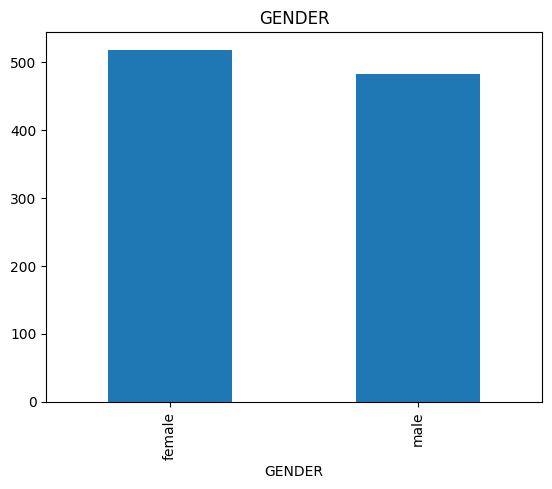

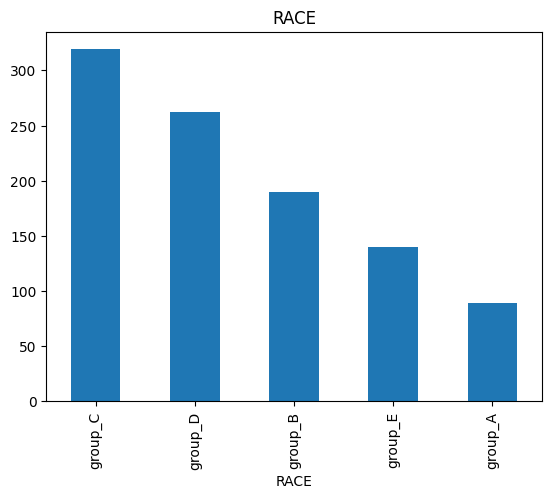

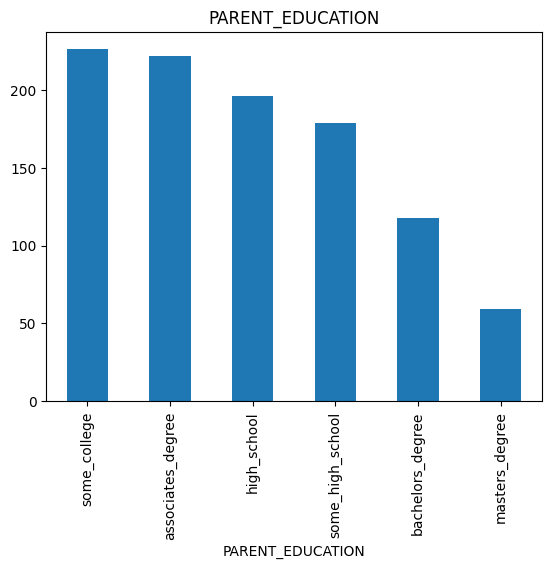

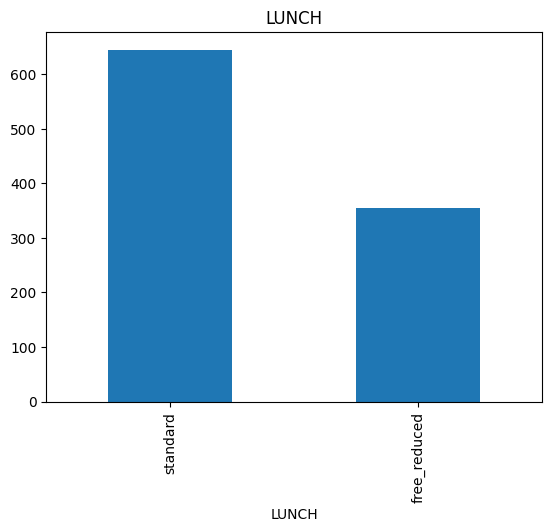

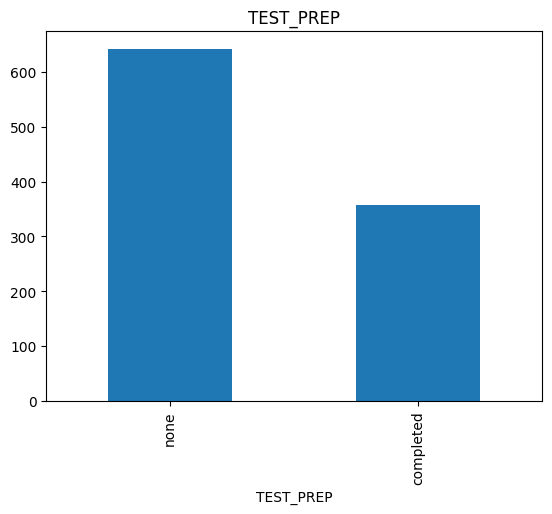

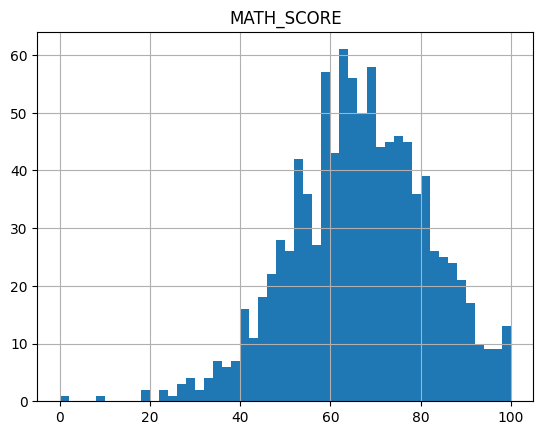

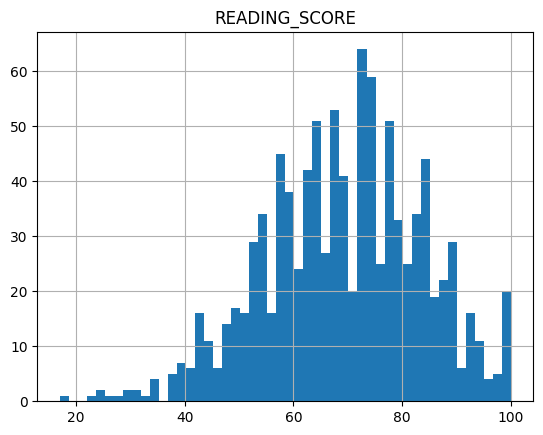

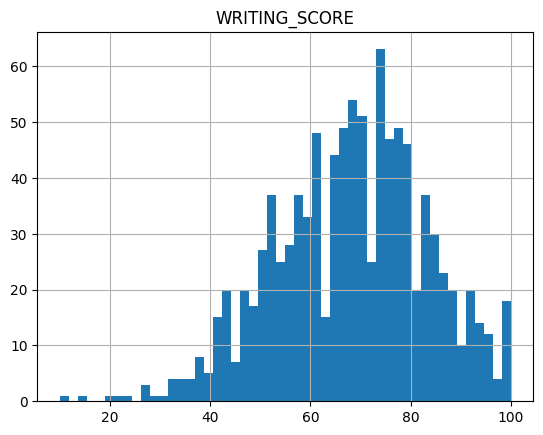

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

for col in plain_df.columns:
    if plain_df[col].dtype == 'object':
        plain_df[col].value_counts().plot(kind='bar', title=col)
        plt.show()
    else:
        plain_df[col].hist(bins=50)
        plt.title(col)
        plt.show()

# Correlations

In [6]:
# correlation function
import seaborn as sns
import matplotlib.pyplot as plt

def abs_correlation_matrix(df, target_col):
    corr = df.corr()[target_col].abs().sort_values(by=target_col, ascending=False)
    return corr

def correlation_matrix(df, target_col):
    corr = df.corr()[target_col].sort_values(by=target_col, ascending=False)
    return corr

In [7]:
math_corr = abs_correlation_matrix(encoded_df.drop(columns=['READING_SCORE', 'WRITING_SCORE']), ['MATH_SCORE'])
math_corr.rename(columns={'MATH_SCORE':'MATH_SCORE Correlations'}, inplace=True)
math_corr_10 = math_corr[1:6]
correlation_matrix(encoded_df.drop(columns=['READING_SCORE', 'WRITING_SCORE']), ['MATH_SCORE'])

,MATH_SCORE
MATH_SCORE,1.000000
RACE_GROUP_E,0.205855
TEST_PREP_COMPLETED,0.177702
GENDER_MALE,0.167982
PARENT_EDUCATION_BACHELORS_DEGREE,0.079664
PARENT_EDUCATION_ASSOCIATES_DEGREE,0.063228
PARENT_EDUCATION_MASTERS_DEGREE,0.060417
RACE_GROUP_D,0.050071
PARENT_EDUCATION_SOME_COLLEGE,0.037056
RACE_GROUP_C,-0.073387


In [8]:
reading_corr = abs_correlation_matrix(encoded_df.drop(columns=['MATH_SCORE', 'WRITING_SCORE']), ['READING_SCORE'])
reading_corr.rename(columns={'READING_SCORE':'READING_SCORE Correlations'}, inplace=True)
reading_corr_10 = reading_corr[1:7]
correlation_matrix(encoded_df.drop(columns=['MATH_SCORE', 'WRITING_SCORE']), ['READING_SCORE'])

,READING_SCORE
READING_SCORE,1.000000
TEST_PREP_COMPLETED,0.241780
RACE_GROUP_E,0.106712
PARENT_EDUCATION_MASTERS_DEGREE,0.106452
PARENT_EDUCATION_BACHELORS_DEGREE,0.096024
PARENT_EDUCATION_ASSOCIATES_DEGREE,0.064386
RACE_GROUP_D,0.035177
PARENT_EDUCATION_SOME_COLLEGE,0.010782
RACE_GROUP_C,-0.003074
RACE_GROUP_B,-0.060283


In [9]:
writing_corr = abs_correlation_matrix(encoded_df.drop(columns=['READING_SCORE', 'MATH_SCORE']), ['WRITING_SCORE'])
writing_corr.rename(columns={'WRITING_SCORE':'WRITING_SCORE Correlations'}, inplace=True)
writing_corr_10 = writing_corr[1:8]
correlation_matrix(encoded_df.drop(columns=['READING_SCORE', 'MATH_SCORE']), ['WRITING_SCORE'])

,WRITING_SCORE
WRITING_SCORE,1.000000
TEST_PREP_COMPLETED,0.312946
PARENT_EDUCATION_BACHELORS_DEGREE,0.128297
PARENT_EDUCATION_MASTERS_DEGREE,0.125693
RACE_GROUP_E,0.089077
RACE_GROUP_D,0.082032
PARENT_EDUCATION_ASSOCIATES_DEGREE,0.064799
PARENT_EDUCATION_SOME_COLLEGE,0.027989
RACE_GROUP_C,-0.010203
RACE_GROUP_B,-0.078254


### Summary points
**MATH_SCORE**
- The largest positive correlations were from RACE_GROUP_E, TEST_PREP_COMPLETED and GENDER_MALE.
- The largest negative correlations were from LUNCH_FREE_REDUCED and PARENT_EDUCATION_HIGH_SCHOOL.

That is, a male student of race group E that completed the test, who did not recieve free/reduced school meals and whose parents have more than a high school education, is likely to achieve a high score in the math test.

**READING_SCORE**
- The largest positive correlations were from TEST_PREP_COMPLETED, RACE_GROUP_E and PARENTS_EDUCATION_MASTERS_DEGREE.
- The largest negative correlations were from GENDER_MALE, LUNCH_FREE_REDUCED and PARENT_EDUCATION_HIGH_SCHOOL.

That is a female student of race group E who did not recieve free/reduced lunch and whose parents have a masters degree is likely to achieve a high score in the reading test.

**WRITING_SCORE**
- The largest positive correlations were from TEST_PREP_COMPLETED, PARENT_EDUCATION_BACHELORS_DEGREE and PARENT_EDUCATION_MASTERS_DEGREE.
- The largest negative correlations were from GENDER_MALE, LUNCH_FREE_REDUCED, PARENT_EDUCATION_HIGH_SCHOOL and RACE_GROUP_A

That is a female student, not of race A, whose parents have a bachelors or masters degree, completed the test prep and didn't recieve free/reduced lunch is likely to achieve a high score in the writing test.

# Math score predictions

In [10]:
from sklearn.model_selection import train_test_split
from numpy import random
rng = random.RandomState(123)

# X = encoded_df.drop(columns=['MATH_SCORE', 'READING_SCORE', 'WRITING_SCORE'])
X = encoded_df[math_corr_10.index]
y_math = plain_df['MATH_SCORE']

X_train, X_test, y_train_math, y_test_math = train_test_split(X, y_math, test_size=0.2, random_state=rng)

print('Encoded data train-test split:')
print(f'{X_train.shape=}, {X_test.shape=}, {y_train_math.shape=}, {y_test_math.shape=}')


Encoded data train-test split:
X_train.shape=(800, 5), X_test.shape=(200, 5), y_train_math.shape=(800,), y_test_math.shape=(200,)


In [11]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

forest = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=rng)
gradient_boost = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.2, random_state=rng)


forest = forest.fit(X_train, y_train_math)
forest_math = forest.predict(X_test)

boost = gradient_boost.fit(X_train, y_train_math)
boost_math = boost.predict(X_test)

In [12]:
# helper function to evaluate the models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def regression_metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}


In [13]:
math_forest_metrics = regression_metrics(y_test_math, forest_math)
math_boost_metrics = regression_metrics(y_test_math, boost_math)

print(f'Math score random forest regression metrics:\n{math_forest_metrics}')
print(f'\nMath score XGBoost metrics:\n{math_boost_metrics}')

Math score random forest regression metrics:
{'MAE': 11.368799307794346, 'MSE': 191.66770600297536, 'RMSE': 13.844410641229022, 'R2': 0.1745278209764033}

Math score XGBoost metrics:
{'MAE': 11.389202632904052, 'MSE': 192.6887003238782, 'RMSE': 13.881235547453196, 'R2': 0.17013061487203573}


# Reading score predictions

In [14]:
X = encoded_df[reading_corr_10.index]
y_reading = plain_df['READING_SCORE']

X_train, X_test, y_train_reading, y_test_reading = train_test_split(X, y_reading, test_size=0.2, random_state=rng)

print('Encoded data train-test split:')
print(f'{X_train.shape=}, {X_test.shape=}, {y_train_reading.shape=}, {y_test_reading.shape=}')

Encoded data train-test split:
X_train.shape=(800, 6), X_test.shape=(200, 6), y_train_reading.shape=(800,), y_test_reading.shape=(200,)


In [15]:
forest = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=rng)
gradient_boost = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.2, random_state=rng)


forest = forest.fit(X_train, y_train_reading)
forest_reading = forest.predict(X_test)

boost = gradient_boost.fit(X_train, y_train_reading)
boost_reading = boost.predict(X_test)

In [16]:
reading_forest_metrics = regression_metrics(y_test_reading, forest_reading)
reading_boost_metrics = regression_metrics(y_test_reading, boost_reading)

print(f'Reading score random forest regression metrics:\n{reading_forest_metrics}')
print(f'\nReading score XGBoost metrics:\n{reading_boost_metrics}')

Reading score random forest regression metrics:
{'MAE': 11.377089005206033, 'MSE': 190.9072735943737, 'RMSE': 13.816919830207226, 'R2': 0.05632112927525512}

Reading score XGBoost metrics:
{'MAE': 11.522459163665772, 'MSE': 196.45817173813535, 'RMSE': 14.016353724779329, 'R2': 0.02888233559711073}


# Writing score predictions

In [17]:
X = encoded_df[writing_corr_10.index]
y_writing = plain_df['READING_SCORE']

X_train, X_test, y_train_writing, y_test_writing = train_test_split(X, y_writing, test_size=0.2, random_state=rng)

print('Encoded data train-test split:')
print(f'{X_train.shape=}, {X_test.shape=}, {y_train_writing.shape=}, {y_test_writing.shape=}')

Encoded data train-test split:
X_train.shape=(800, 7), X_test.shape=(200, 7), y_train_writing.shape=(800,), y_test_writing.shape=(200,)


In [18]:
forest = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=rng)
gradient_boost = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.2, random_state=rng)


forest = forest.fit(X_train, y_train_writing)
forest_writing = forest.predict(X_test)

boost = gradient_boost.fit(X_train, y_train_writing)
boost_writing = boost.predict(X_test)

In [19]:
writing_forest_metrics = regression_metrics(y_test_writing, forest_writing)
writing_boost_metrics = regression_metrics(y_test_writing, boost_writing)

print(f'Writing score random forest regression metrics:\n{writing_forest_metrics}')
print(f'\nWriting score XGBoost metrics:\n{writing_boost_metrics}')

Writing score random forest regression metrics:
{'MAE': 10.146447910450554, 'MSE': 167.33413401201767, 'RMSE': 12.935769556235055, 'R2': 0.16655050804513072}

Writing score XGBoost metrics:
{'MAE': 10.295299396514892, 'MSE': 168.79804049898644, 'RMSE': 12.992230004852379, 'R2': 0.1592591557753904}


# Summary

Given the nature of what we are aiming to predict, the mean absolute error (MAE) is a simple and accurate metric to use as a reference between models

In [20]:
metrics = {'Subject':['Math', 'Reading', 'Writing'], 
           'Random Forrest MAE':[math_forest_metrics['MAE'], reading_forest_metrics['MAE'], writing_forest_metrics['MAE']],
           'XGBoost MAE':[math_boost_metrics['MAE'], reading_boost_metrics['MAE'], writing_boost_metrics['MAE']]
           }
metrics_df = pd.DataFrame(metrics)
metrics_df

,Subject,Random Forrest MAE,XGBoost MAE
0,Math,11.368799,11.389203
1,Reading,11.377089,11.522459
2,Writing,10.146448,10.295299


Put into the context of predicting the exam results of a student given the data collected on them about GENDER, RACE, PARENT_EDUCATION, LUNCH and TEST_PREP, we can predict their **math and reading scores with about 11% uncertainty** about **10% for that or writing**.

# Predictions on test set using Random Forest

In [21]:
df_pred = X_test.copy()
df_pred['MATH_SCORE_pred'] = forest_math
df_pred['READING_SCORE_pred'] = forest_reading
df_pred['WRITING_SCORE_pred'] = forest_writing

plain_df_pred = pd.concat([plain_df, df_pred[['MATH_SCORE_pred', 'READING_SCORE_pred', 'WRITING_SCORE_pred']]], axis=1, join='inner')
plain_df_pred

,GENDER,RACE,PARENT_EDUCATION,LUNCH,TEST_PREP,MATH_SCORE,READING_SCORE,WRITING_SCORE,MATH_SCORE_pred,READING_SCORE_pred,WRITING_SCORE_pred
3,male,group_A,associates_degree,free_reduced,none,47,57,44,69.664326,72.785766,56.263421
8,male,group_D,high_school,free_reduced,completed,64,64,67,69.477945,62.370961,62.225672
15,female,group_C,some_high_school,standard,none,69,75,78,65.850303,73.578431,74.716267
25,male,group_A,masters_degree,free_reduced,none,73,74,72,65.850303,72.785766,59.834735
33,male,group_D,some_college,standard,none,40,42,38,69.477945,73.320311,64.919663
...,...,...,...,...,...,...,...,...,...,...,...
983,female,group_A,some_college,standard,completed,78,87,91,75.286795,63.531201,76.857925
990,male,group_E,high_school,free_reduced,completed,86,81,75,62.955018,72.785766,62.225672
996,male,group_C,high_school,free_reduced,none,62,55,55,65.850303,63.531201,55.949448
997,female,group_C,high_school,free_reduced,completed,59,71,65,65.508454,73.006977,69.104663


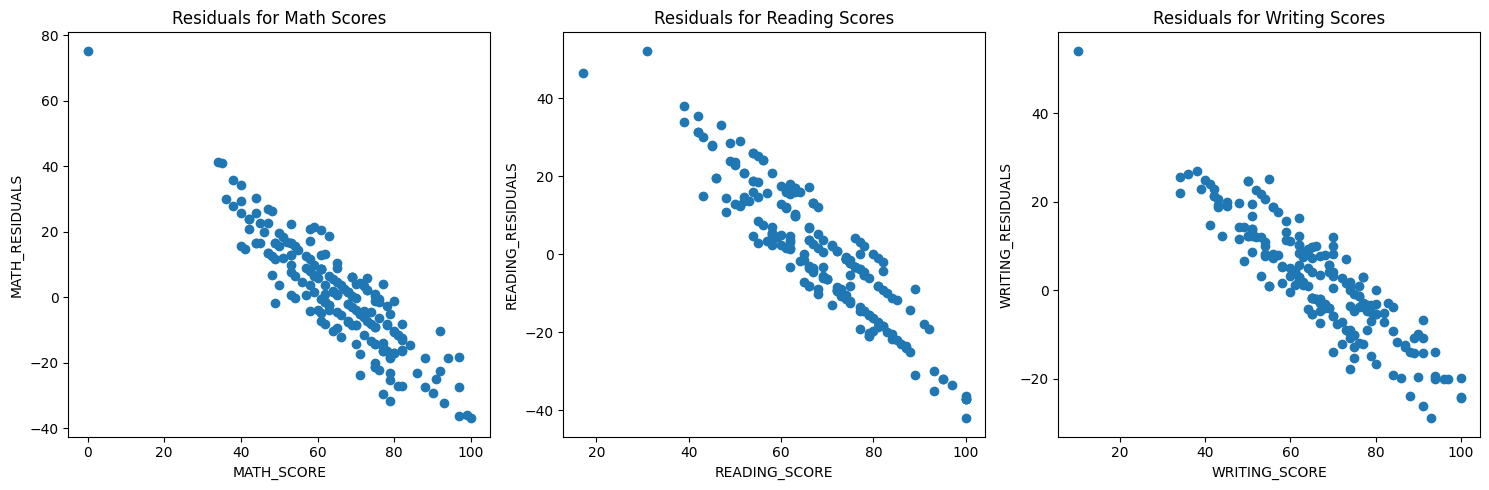

In [22]:
import matplotlib.pyplot as plt

# Calculate the residuals for each subject and prediction
plain_df_pred['MATH_RESIDUALS'] = plain_df_pred['MATH_SCORE_pred'] - plain_df_pred['MATH_SCORE']
plain_df_pred['READING_RESIDUALS'] = plain_df_pred['READING_SCORE_pred'] - plain_df_pred['READING_SCORE']
plain_df_pred['WRITING_RESIDUALS'] = plain_df_pred['WRITING_SCORE_pred'] - plain_df_pred['WRITING_SCORE']

# Create the figure and axes for the plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the residuals for each subject and prediction
axs[0].scatter(plain_df_pred['MATH_SCORE'], plain_df_pred['MATH_RESIDUALS'])
axs[0].set_xlabel('MATH_SCORE')
axs[0].set_ylabel('MATH_RESIDUALS')
axs[0].set_title('Residuals for Math Scores')

axs[1].scatter(plain_df_pred['READING_SCORE'], plain_df_pred['READING_RESIDUALS'])
axs[1].set_xlabel('READING_SCORE')
axs[1].set_ylabel('READING_RESIDUALS')
axs[1].set_title('Residuals for Reading Scores')

axs[2].scatter(plain_df_pred['WRITING_SCORE'], plain_df_pred['WRITING_RESIDUALS'])
axs[2].set_xlabel('WRITING_SCORE')
axs[2].set_ylabel('WRITING_RESIDUALS')
axs[2].set_title('Residuals for Writing Scores')

plt.tight_layout()
plt.show()
